# polaris_asap_poses.    

In [1]:
%load_ext autoreload
%autoreload 2    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
from pathlib import Path
POLARIS_ASAP_POSES_HOME = Path(os.environ["POLARIS_ASAP_POSES_HOME"])
os.chdir(POLARIS_ASAP_POSES_HOME)    

In [3]:
from polaris_asap_poses.settings import get_settings
settings = get_settings()    

In [4]:
from polaris_asap_poses.logger import logger
logger.info("hello world")    

INFO    | 2025-03-06 01:53:17.411| __main__:2   | hello world


In [5]:
import polars as pl
import numpy as np
import polars.selectors as cs
from tqdm import tqdm
from pathlib import Path    

In [6]:
import polaris as po
comp = po.load_competition("asap-discovery/antiviral-ligand-poses-2025")

[2025-03-06 01:53:21] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=285996;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=452399;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.9).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=630501;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=444953;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py#181\181]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

In [7]:
comp.cache()

Output()

[01:53:22] Copying to destination                                                                      ]8;id=253086;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=443529;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py#380\380]8;;\
           /home/cbrown/.cache/polaris/datasets/a478ef5e-0f4a-47bb-bc4f-d40bf0fb61f3/data.zarr                     

           For large Zarr archives, this may take a while.                                             ]8;id=218483;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=841987;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/dataset/_base.py#381\381]8;;\

[01:53:32]  Success: Copying Zarr keys                                                                ]8;id=617095;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=825508;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=818469;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=925750;file:///home/cbrown/workspace/polaris-asap-poses/.venv/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

'/home/cbrown/.cache/polaris/datasets/a478ef5e-0f4a-47bb-bc4f-d40bf0fb61f3'

In [8]:
train, test = comp.get_train_test_split()

In [10]:
train.input_cols.append("Protein Structure")

In [12]:
train.input_cols.append("Complex Structure")

In [15]:
X, y = train[0]

In [19]:
type(X["Complex Structure"][4])

biotite.structure.Atom

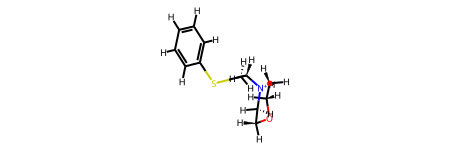

In [20]:
y

In [22]:
test[0]

{'Chain A Sequence': 'SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPADQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQILGSTMLEDEFTPEDVNMQIMGV',
 'Chain B Sequence': 'SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPADQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQILGSTMLEDEFTPEDVNMQIMGV',
 'CXSMILES': 'O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncncn1',
 'Protein Label': 'MERS-CoV Mpro'}

In [21]:
train[0]

({'Chain A Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT',
  'Chain B Sequence': 'SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVT',
  'CXSMILES': 'c1ccc(SCC[NH+]2CCOCC2)cc1',
  'Protein Label': 'SARS-CoV-2 Mpro',
  'Protein Structure': array([
  	Atom(np.array([ -2.395,   4.215, -17.097], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="SER", hetero=False, atom_name="N", element="N", atom_id=1, b_factor=20.0, charge=0, occupancy=1.0),
  	Atom(np.array([ 

In [23]:
X["CXSMILES"]

'c1ccc(SCC[NH+]2CCOCC2)cc1'

In [24]:
X["Complex Structure"]

array([
	Atom(np.array([ -2.395,   4.215, -17.097], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="SER", hetero=False, atom_name="N", element="N", atom_id=1, b_factor=20.0, charge=0, occupancy=1.0),
	Atom(np.array([ -1.977,   5.504, -16.496], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="SER", hetero=False, atom_name="CA", element="C", atom_id=2, b_factor=20.0, charge=0, occupancy=1.0),
	Atom(np.array([ -2.341,   5.543, -15.01 ], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="SER", hetero=False, atom_name="C", element="C", atom_id=3, b_factor=20.0, charge=0, occupancy=1.0),
	Atom(np.array([ -2.968,   4.585, -14.502], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="SER", hetero=False, atom_name="O", element="O", atom_id=4, b_factor=20.0, charge=0, occupancy=1.0),
	Atom(np.array([ -2.582,   6.68 , -17.217], dtype=float32), chain_id="A", res_id=1, ins_code="", res_name="SER", hetero=False, atom_name="CB", element="C", atom_id

In [25]:
type(test[0])

dict

In [26]:
type(X)

dict

In [27]:
type(y)

rdkit.Chem.rdchem.Mol

In [28]:
DATA_DIR_GNINA_TEST_CASE=POLARIS_ASAP_POSES_HOME / "data/gnina-test-case/"
import py3Dmol
v = py3Dmol.view()
v.addModel(open(DATA_DIR_GNINA_TEST_CASE / 'rec.pdb').read())
v.setStyle({'cartoon':{},'stick':{'radius':.1}})
v.addModel(open(DATA_DIR_GNINA_TEST_CASE / 'lig.pdb').read())
v.setStyle({'model':1},{'stick':{'colorscheme':'dimgrayCarbon','radius':.125}})
v.addModelsAsFrames(open(DATA_DIR_GNINA_TEST_CASE / 'docked.sdf').read())
v.setStyle({'model':2},{'stick':{'colorscheme':'greenCarbon'}})
v.zoomTo({'model':1})
v.rotate(90)
v.animate({'interval':1000})


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [29]:
from polaris_asap_poses.download import get_df_train_for_comp, get_df_test_for_comp

In [30]:
df_train = get_df_train_for_comp(comp)

INFO    | 2025-03-06 02:08:42.070| polaris_asap_poses.download:97  | Loading training dataframe for comp antiviral-ligand-poses-2025...
INFO    | 2025-03-06 02:08:49.691| polaris_asap_poses.util:17  | Shape: (770, 6), size: 0.0004889778792858124 GB (0.5007133483886719 MB), columns: ['train_fake_id: Int64', 'protein_label: String', 'CXSMILES: String', 'ligand_pose: Object', 'chain_a_sequence: String', 'chain_b_sequence: String'].


In [31]:
df_train.head()

shape: (5, 6)
┌───────────────┬────────────────┬────────────────┬────────────────┬───────────────┬───────────────┐
│ train_fake_id ┆ protein_label  ┆ CXSMILES       ┆ ligand_pose    ┆ chain_a_seque ┆ chain_b_seque │
│ ---           ┆ ---            ┆ ---            ┆ ---            ┆ nce           ┆ nce           │
│ i64           ┆ str            ┆ str            ┆ object         ┆ ---           ┆ ---           │
│               ┆                ┆                ┆                ┆ str           ┆ str           │
╞═══════════════╪════════════════╪════════════════╪════════════════╪═══════════════╪═══════════════╡
│ 0             ┆ SARS-CoV-2     ┆ c1ccc(SCC[NH+] ┆ <rdkit.Chem.rd ┆ SGFRKMAFPSGKV ┆ SGFRKMAFPSGKV │
│               ┆ Mpro           ┆ 2CCOCC2)cc1    ┆ chem.Mol       ┆ EGCMVQVTCGTTT ┆ EGCMVQVTCGTTT │
│               ┆                ┆                ┆ object at 0x7d ┆ LNGLWLDDVVYCP ┆ LNGLWLDDVVYCP │
│               ┆                ┆                ┆ 77d7389f80>    ┆ RHVICTSEDMLNP ┆ RHVICTSEDMLNP │
│               ┆                ┆                ┆                ┆ NYEDLLIRKSNHN ┆ NYEDLLIRKSNHN │
│               ┆                ┆                ┆                ┆ FLVQAGNVQLRVI ┆ FLVQAGNVQLRVI │
│               ┆                ┆                ┆                ┆ GHSMQNCVLKLKV ┆ GHSMQNCVLKLKV │
│               ┆                ┆                ┆                ┆ DTANPKTPKYKFV ┆ DTANPKTPKYKFV │
│               ┆                ┆                ┆                ┆ RIQPGQTFSVLAC ┆ RIQPGQTFSVLAC │
│               ┆                ┆                ┆                ┆ YNGSPSGVYQCAM ┆ YNGSPSGVYQCAM │
│               ┆                ┆                ┆                ┆ RPNFTIKGSFLNG ┆ RPNFTIKGSFLNG │
│               ┆                ┆                ┆                ┆ SCGSVGFNIDYDC ┆ SCGSVGFNIDYDC │
│               ┆                ┆                ┆                ┆ VSFCYMHHMELPT ┆ VSFCYMHHMELPT │
│               ┆                ┆                ┆                ┆ GVHAGTDLEGNFY ┆ GVHAGTDLEGNFY │
│               ┆                ┆                ┆                ┆ GPFVDRQTAQAAG ┆ GPFVDRQTAQAAG │
│               ┆                ┆                ┆                ┆ TDTTITVNVLAWL ┆ TDTTITVNVLAWL │
│               ┆                ┆                ┆                ┆ YAAVINGDRWFLN ┆ YAAVINGDRWFLN │
│               ┆                ┆                ┆                ┆ RFTTTLNDFNLVA ┆ RFTTTLNDFNLVA │
│               ┆                ┆                ┆                ┆ MKYNYEPLTQDHV ┆ MKYNYEPLTQDHV │
│               ┆                ┆                ┆                ┆ DILGPLSAQTGIA ┆ DILGPLSAQTGIA │
│               ┆                ┆                ┆                ┆ VLDMCASLKELLQ ┆ VLDMCASLKELLQ │
│               ┆                ┆                ┆                ┆ NGMNGRTILGSAL ┆ NGMNGRTILGSAL │
│               ┆                ┆                ┆                ┆ LEDEFTPFDVVRQ ┆ LEDEFTPFDVVRQ │
│               ┆                ┆                ┆                ┆ CSGVT         ┆ CSGVT         │
│ 1             ┆ SARS-CoV-2     ┆ O=C(Cc1cccc(Cl ┆ <rdkit.Chem.rd ┆ SGFRKMAFPSGKV ┆ SGFRKMAFPSGKV │
│               ┆ Mpro           ┆ )c1)Nc1cncc2cc ┆ chem.Mol       ┆ EGCMVQVTCGTTT ┆ EGCMVQVTCGTTT │
│               ┆                ┆ ncc12          ┆ object at 0x7d ┆ LNGLWLDDVVYCP ┆ LNGLWLDDVVYCP │
│               ┆                ┆                ┆ 77d7353dd0>    ┆ RHVICTSEDMLNP ┆ RHVICTSEDMLNP │
│               ┆                ┆                ┆                ┆ NYEDLLIRKSNHN ┆ NYEDLLIRKSNHN │
│               ┆                ┆                ┆                ┆ FLVQAGNVQLRVI ┆ FLVQAGNVQLRVI │
│               ┆                ┆                ┆                ┆ GHSMQNCVLKLKV ┆ GHSMQNCVLKLKV │
│               ┆                ┆                ┆                ┆ DTANPKTPKYKFV ┆ DTANPKTPKYKFV │
│               ┆                ┆                ┆                ┆ RIQPGQTFSVLAC ┆ RIQPGQTFSVLAC │
│               ┆                ┆             

In [32]:
df_train.describe()

shape: (9, 7)
┌────────────┬──────────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ statistic  ┆ train_fake_i ┆ protein_labe ┆ CXSMILES    ┆ ligand_pose ┆ chain_a_seq ┆ chain_b_seq │
│ ---        ┆ d            ┆ l            ┆ ---         ┆ ---         ┆ uence       ┆ uence       │
│ str        ┆ ---          ┆ ---          ┆ str         ┆ str         ┆ ---         ┆ ---         │
│            ┆ f64          ┆ str          ┆             ┆             ┆ str         ┆ str         │
╞════════════╪══════════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ count      ┆ 770.0        ┆ 770          ┆ 770         ┆ 770         ┆ 770         ┆ 770         │
│ null_count ┆ 0.0          ┆ 0            ┆ 0           ┆ 0           ┆ 0           ┆ 0           │
│ mean       ┆ 384.5        ┆ null         ┆ null        ┆ null        ┆ null        ┆ null        │
│ std        ┆ 222.424144   ┆ null         ┆ null        ┆ null        ┆ null        ┆ null        │
│ min        ┆ 0.0          ┆ SARS-CoV-2   ┆ C#CC[NH+]1C ┆ null        ┆ GAMSGFRKMAF ┆ GFRKMAFPSGK │
│            ┆              ┆ Mpro         ┆ CN(C(C)=O)C ┆             ┆ PSGKVEGCMVQ ┆ VEGCMVQVTCG │
│            ┆              ┆              ┆ C1          ┆             ┆ VTCGTTTLNGL ┆ TTTLNGLWLDD │
│            ┆              ┆              ┆             ┆             ┆ WLDDVVYCPRH ┆ VVYCPRHVICT │
│            ┆              ┆              ┆             ┆             ┆ VICTSEDMLNP ┆ SEDMLNPNYED │
│            ┆              ┆              ┆             ┆             ┆ NYEDLLIRKSN ┆ LLIRKSNHNFL │
│            ┆              ┆              ┆             ┆             ┆ HNFLVQAGNVQ ┆ VQAGNVQLRVI │
│            ┆              ┆              ┆             ┆             ┆ LRVIGHSMQNC ┆ GHSMQNCVLKL │
│            ┆              ┆              ┆             ┆             ┆ VLKLKVDTANP ┆ KVDTANPKTPK │
│            ┆              ┆              ┆             ┆             ┆ KTPKYKFVRIQ ┆ YKFVRIQPGQT │
│            ┆              ┆              ┆             ┆             ┆ PGQTFSVLACY ┆ FSVLACYNGSP │
│            ┆              ┆              ┆             ┆             ┆ NGSPSGVYQCA ┆ SGVYQCAMRPN │
│            ┆              ┆              ┆             ┆             ┆ MRPNFTIKGSF ┆ FTIKGSFLNGS │
│            ┆              ┆              ┆             ┆             ┆ LNGSCGSVGFN ┆ CGSVGFNIDYD │
│            ┆              ┆              ┆             ┆             ┆ IDYDCVSFCYM ┆ CVSFCYMHHME │
│            ┆              ┆              ┆             ┆             ┆ HHMELPTGVHA ┆ LPTGVHAGTDL │
│            ┆              ┆              ┆             ┆             ┆ GTDLEGNFYGP ┆ EGNFYGPFVDR │
│            ┆              ┆              ┆             ┆             ┆ FVDRQTAQAAG ┆ QTAQAAGTDTT │
│            ┆              ┆              ┆             ┆             ┆ TDTTITVNVLA ┆ ITVNVLAWLYA │
│            ┆              ┆              ┆             ┆             ┆ WLYAAVINGDR ┆ AVINGDRWFLN │
│            ┆              ┆              ┆             ┆             ┆ WFLNRFTTTLN ┆ RFTTTLNDFNL │
│            ┆              ┆              ┆             ┆             ┆ DFNLVAMKYNY ┆ VAMKYNYEPLT │
│            ┆              ┆              ┆             ┆             ┆ EPLTQDHVDIL ┆ QDHVDILGPLS │
│            ┆              ┆              ┆             ┆             ┆ GPLSAQTGIAV ┆ AQTGIAVLDMC │
│            ┆              ┆              ┆             ┆             ┆ LDMCASLKELL ┆ ASLKELLQNGM │
│            ┆              ┆              ┆             ┆             ┆ QNGMNGRTILG ┆ NGRTILGSALL │
│            ┆              ┆              ┆             ┆             ┆ SALLEDEFTPF ┆ EDEFTPFDVVR │
│            ┆              ┆              ┆             ┆             ┆ DVVRQCS     ┆ QCS         │
│ 25%        ┆ 192.0        ┆ null         ┆ null        ┆ null        ┆ null        ┆ null        │
│ 50%        ┆ 385.0        ┆ null         ┆ nu

In [33]:
df_test = get_df_test_for_comp(comp)

INFO    | 2025-03-06 02:09:21.648| polaris_asap_poses.download:117 | Loading training dataframe for comp antiviral-ligand-poses-2025...
INFO    | 2025-03-06 02:09:22.284| polaris_asap_poses.util:17  | Shape: (195, 5), size: 0.00012560654431581497 GB (0.12862110137939453 MB), columns: ['test_fake_id: Int64', 'protein_label: String', 'CXSMILES: String', 'chain_a_sequence: String', 'chain_b_sequence: String'].


In [34]:
df_test.head()

shape: (5, 5)
┌──────────────┬─────────────────┬─────────────────────┬─────────────────────┬─────────────────────┐
│ test_fake_id ┆ protein_label   ┆ CXSMILES            ┆ chain_a_sequence    ┆ chain_b_sequence    │
│ ---          ┆ ---             ┆ ---                 ┆ ---                 ┆ ---                 │
│ i64          ┆ str             ┆ str                 ┆ str                 ┆ str                 │
╞══════════════╪═════════════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ 0            ┆ MERS-CoV Mpro   ┆ O=C1c2ccc(Cl)cc2[C@ ┆ SGLVKMSHPSGDVEACMVQ ┆ SGLVKMSHPSGDVEACMVQ │
│              ┆                 ┆ @]2(CN1Cc1nnco1)C(= ┆ VTCGSMTLNGLWLDNTVWC ┆ VTCGSMTLNGLWLDNTVWC │
│              ┆                 ┆ O)N(c1cncc3ccccc13) ┆ PRHVMCPADQLSDPNYDAL ┆ PRHVMCPADQLSDPNYDAL │
│              ┆                 ┆ C[C@@H]2CNc1ncncn1  ┆ LISMTNHSFSVQKHIGAPA ┆ LISMTNHSFSVQKHIGAPA │
│              ┆                 ┆                     ┆ NLRVVGHAMQGTLLKLTVD ┆ NLRVVGHAMQGTLLKLTVD │
│              ┆                 ┆                     ┆ VANPSTPAYTFTTVKPGAA ┆ VANPSTPAYTFTTVKPGAA │
│              ┆                 ┆                     ┆ FSVLACYNGRPTGTFTVVM ┆ FSVLACYNGRPTGTFTVVM │
│              ┆                 ┆                     ┆ RPNYTIKGSFLCGSCGSVG ┆ RPNYTIKGSFLCGSCGSVG │
│              ┆                 ┆                     ┆ YTKEGSVINFCYMHQMELA ┆ YTKEGSVINFCYMHQMELA │
│              ┆                 ┆                     ┆ NGTHTGSAFDGTMYGAFMD ┆ NGTHTGSAFDGTMYGAFMD │
│              ┆                 ┆                     ┆ KQVHQVQLTDKYCSVNVVA ┆ KQVHQVQLTDKYCSVNVVA │
│              ┆                 ┆                     ┆ WLYAAILNGCAWFVKPNRT ┆ WLYAAILNGCAWFVKPNRT │
│              ┆                 ┆                     ┆ SVVSFNEWALANQFTEFVG ┆ SVVSFNEWALANQFTEFVG │
│              ┆                 ┆                     ┆ TQSVDMLAVKTGVAIEQLL ┆ TQSVDMLAVKTGVAIEQLL │
│              ┆                 ┆                     ┆ YAIQQLYTGFQGKQILGST ┆ YAIQQLYTGFQGKQILGST │
│              ┆                 ┆                     ┆ MLEDEFTPEDVNMQIMGV  ┆ MLEDEFTPEDVNMQIMGV  │
│ 1            ┆ MERS-CoV Mpro   ┆ COc1ccc(N(Cc2cccc(C ┆ SGLVKMSHPSGDVEACMVQ ┆ SGLVKMSHPSGDVEACMVQ │
│              ┆                 ┆ l)c2)C(=O)Cc2cncc3c ┆ VTCGSMTLNGLWLDNTVWC ┆ VTCGSMTLNGLWLDNTVWC │
│              ┆                 ┆ cccc23)cc1          ┆ PRHVMCPADQLSDPNYDAL ┆ PRHVMCPADQLSDPNYDAL │
│              ┆                 ┆                     ┆ LISMTNHSFSVQKHIGAPA ┆ LISMTNHSFSVQKHIGAPA │
│              ┆                 ┆                     ┆ NLRVVGHAMQGTLLKLTVD ┆ NLRVVGHAMQGTLLKLTVD │
│              ┆                 ┆                     ┆ VANPSTPAYTFTTVKPGAA ┆ VANPSTPAYTFTTVKPGAA │
│              ┆                 ┆                     ┆ FSVLACYNGRPTGTFTVVM ┆ FSVLACYNGRPTGTFTVVM │
│              ┆                 ┆                     ┆ RPNYTIKGSFLCGSCGSVG ┆ RPNYTIKGSFLCGSCGSVG │
│              ┆                 ┆                     ┆ YTKEGSVINFCYMHQMELA ┆ YTKEGSVINFCYMHQMELA │
│              ┆                 ┆                     ┆ NGTHTGSAFDGTMYGAFMD ┆ NGTHTGSAFDGTMYGAFMD │
│              ┆                 ┆                     ┆ KQVHQVQLTDKYCSVNVVA ┆ KQVHQVQLTDKYCSVNVVA │
│              ┆                 ┆                     ┆ WLYAAILNGCAWFVKPNRT ┆ WLYAAILNGCAWFVKPNRT │
│              ┆                 ┆                     ┆ SVVSFNEWALANQFTEFVG ┆ SVVSFNEWALANQFTEFVG │
│              ┆                 ┆                     ┆ TQSVDMLAVKTGVAIEQLL ┆ TQSVDMLAVKTGVAIEQLL │
│              ┆                 ┆                     ┆ YAIQQLYTGFQGKQILGST ┆ YAIQQLYTGFQGKQILGST │
│              ┆                 ┆                     ┆ MLEDEFTPEDVNMQIMGV  ┆ MLEDEFTPEDVNMQIMGV  │
│ 2            ┆ SARS-CoV-2 Mpro ┆ CNC(=O)CN1C[C@@]2(C ┆ SGFRKMAFPSGKVEGCMVQ ┆ SGFRKMAFPSGKVEGCMVQ │
│              ┆                 ┆ (=O)N(c3cncc4ccccc3 ┆ VTCGTTTLNGLWLDDVVYC ┆ VTCGTTTLNGLWLDDVVYC │
│              ┆                 ┆ 4)C[C@@H]2CN

In [35]:
df_train.describe()

shape: (9, 7)
┌────────────┬──────────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ statistic  ┆ train_fake_i ┆ protein_labe ┆ CXSMILES    ┆ ligand_pose ┆ chain_a_seq ┆ chain_b_seq │
│ ---        ┆ d            ┆ l            ┆ ---         ┆ ---         ┆ uence       ┆ uence       │
│ str        ┆ ---          ┆ ---          ┆ str         ┆ str         ┆ ---         ┆ ---         │
│            ┆ f64          ┆ str          ┆             ┆             ┆ str         ┆ str         │
╞════════════╪══════════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ count      ┆ 770.0        ┆ 770          ┆ 770         ┆ 770         ┆ 770         ┆ 770         │
│ null_count ┆ 0.0          ┆ 0            ┆ 0           ┆ 0           ┆ 0           ┆ 0           │
│ mean       ┆ 384.5        ┆ null         ┆ null        ┆ null        ┆ null        ┆ null        │
│ std        ┆ 222.424144   ┆ null         ┆ null        ┆ null        ┆ null        ┆ null        │
│ min        ┆ 0.0          ┆ SARS-CoV-2   ┆ C#CC[NH+]1C ┆ null        ┆ GAMSGFRKMAF ┆ GFRKMAFPSGK │
│            ┆              ┆ Mpro         ┆ CN(C(C)=O)C ┆             ┆ PSGKVEGCMVQ ┆ VEGCMVQVTCG │
│            ┆              ┆              ┆ C1          ┆             ┆ VTCGTTTLNGL ┆ TTTLNGLWLDD │
│            ┆              ┆              ┆             ┆             ┆ WLDDVVYCPRH ┆ VVYCPRHVICT │
│            ┆              ┆              ┆             ┆             ┆ VICTSEDMLNP ┆ SEDMLNPNYED │
│            ┆              ┆              ┆             ┆             ┆ NYEDLLIRKSN ┆ LLIRKSNHNFL │
│            ┆              ┆              ┆             ┆             ┆ HNFLVQAGNVQ ┆ VQAGNVQLRVI │
│            ┆              ┆              ┆             ┆             ┆ LRVIGHSMQNC ┆ GHSMQNCVLKL │
│            ┆              ┆              ┆             ┆             ┆ VLKLKVDTANP ┆ KVDTANPKTPK │
│            ┆              ┆              ┆             ┆             ┆ KTPKYKFVRIQ ┆ YKFVRIQPGQT │
│            ┆              ┆              ┆             ┆             ┆ PGQTFSVLACY ┆ FSVLACYNGSP │
│            ┆              ┆              ┆             ┆             ┆ NGSPSGVYQCA ┆ SGVYQCAMRPN │
│            ┆              ┆              ┆             ┆             ┆ MRPNFTIKGSF ┆ FTIKGSFLNGS │
│            ┆              ┆              ┆             ┆             ┆ LNGSCGSVGFN ┆ CGSVGFNIDYD │
│            ┆              ┆              ┆             ┆             ┆ IDYDCVSFCYM ┆ CVSFCYMHHME │
│            ┆              ┆              ┆             ┆             ┆ HHMELPTGVHA ┆ LPTGVHAGTDL │
│            ┆              ┆              ┆             ┆             ┆ GTDLEGNFYGP ┆ EGNFYGPFVDR │
│            ┆              ┆              ┆             ┆             ┆ FVDRQTAQAAG ┆ QTAQAAGTDTT │
│            ┆              ┆              ┆             ┆             ┆ TDTTITVNVLA ┆ ITVNVLAWLYA │
│            ┆              ┆              ┆             ┆             ┆ WLYAAVINGDR ┆ AVINGDRWFLN │
│            ┆              ┆              ┆             ┆             ┆ WFLNRFTTTLN ┆ RFTTTLNDFNL │
│            ┆              ┆              ┆             ┆             ┆ DFNLVAMKYNY ┆ VAMKYNYEPLT │
│            ┆              ┆              ┆             ┆             ┆ EPLTQDHVDIL ┆ QDHVDILGPLS │
│            ┆              ┆              ┆             ┆             ┆ GPLSAQTGIAV ┆ AQTGIAVLDMC │
│            ┆              ┆              ┆             ┆             ┆ LDMCASLKELL ┆ ASLKELLQNGM │
│            ┆              ┆              ┆             ┆             ┆ QNGMNGRTILG ┆ NGRTILGSALL │
│            ┆              ┆              ┆             ┆             ┆ SALLEDEFTPF ┆ EDEFTPFDVVR │
│            ┆              ┆              ┆             ┆             ┆ DVVRQCS     ┆ QCS         │
│ 25%        ┆ 192.0        ┆ null         ┆ null        ┆ null        ┆ null        ┆ null        │
│ 50%        ┆ 385.0        ┆ null         ┆ nu

In [36]:
df_train.select(["chain_a_sequence"]).unique()

shape: (17, 1)
┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ chain_a_sequence                                                                                 │
│ ---                                                                                              │
│ str                                                                                              │
╞══════════════════════════════════════════════════════════════════════════════════════════════════╡
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPK │
│ TPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQA │
│ AGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLED │
│ EFTPFDVVRQCSGVT                                                                                  │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLE │
│ DEFTPFDVVRQCSGVTFQ                                                                               │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLE │
│ DEFTPFDVVRQCSGVTFE                                                                               │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVSNGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLE │
│ DEFTPFDVVRQCSGVTFQ                                                                               │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLE │
│ DEFTPFDVVRQCSGVT                                                                                 │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRHNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLE │
│ DEFTPFDVVRQCSG                                                                                   │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVINGWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDE │
│ FTPFDVVRQCSGVT                                                                                   │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLE │
│ DEFTPFDVVRQCSG                                                                                   │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMK

In [37]:
df_train.select(["chain_b_sequence"]).unique()

shape: (27, 1)
┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ chain_b_sequence                                                                                 │
│ ---                                                                                              │
│ str                                                                                              │
╞══════════════════════════════════════════════════════════════════════════════════════════════════╡
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQA │
│ AGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLED │
│ EFTPFDVVRQCSGVT                                                                                  │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQA │
│ AGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLED │
│ EFTPFDVVRQCSGVTF                                                                                 │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVIPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFV │
│ RIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTI │
│ TVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDV │
│ VRQCSGVTF                                                                                        │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKF │
│ VRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTT │
│ ITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFD │
│ VVRQCSGVTF                                                                                       │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYK │
│ FVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVRQTAQAAGTDTT │
│ ITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFD │
│ VVRQCSGVTF                                                                                       │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVINGWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDE │
│ FTPFDVVRQCSGVT                                                                                   │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKT │
│ PKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAA │
│ GTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDE │
│ FTPFDVVRQCSGVTF                                                                                  │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP │
│ KTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQ │
│ AAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLE │
│ DEFTPFDVVRQCS                                                                                    │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKY │
│ KFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTD │
│ TTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEP

In [38]:
df_train.select(["chain_a_sequence", "chain_b_sequence"]).unique()

shape: (58, 2)
┌─────────────────────────────────────────────────┬────────────────────────────────────────────────┐
│ chain_a_sequence                                ┆ chain_b_sequence                               │
│ ---                                             ┆ ---                                            │
│ str                                             ┆ str                                            │
╞═════════════════════════════════════════════════╪════════════════════════════════════════════════╡
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSE ┆ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVINYE │
│ DMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTA ┆ DLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKY │
│ NPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFL ┆ KFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGS │
│ NGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDR ┆ VGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQA │
│ QTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAM ┆ AGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNY │
│ KYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTIL ┆ EPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSA │
│ GSALLEDEFTPFDVVRQCSGVTFQ                        ┆ LLEDEFTPFDVVRQCSGVTF                           │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSE ┆ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVINYE │
│ DMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTA ┆ DSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRI │
│ NPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFL ┆ QPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNI │
│ NGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDR ┆ DYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDT │
│ QTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAM ┆ TITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQ │
│ KYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTIL ┆ DHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDE │
│ GSALLEDEFTPFDVVRQC                              ┆ FTPFDVVRQCSGVTF                                │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSE ┆ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS │
│ DMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTA ┆ EDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVD │
│ NPKTPKYKFVRIQPGTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLN ┆ TANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKG │
│ GSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQ ┆ SFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGP │
│ TAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMK ┆ FVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDF │
│ YNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILG ┆ NLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGM │
│ SALLEDEFTPFDVVRQCSGVTF                          ┆ NGRTILGSALLEDEFTPFDVVRQCSGVTF                  │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSE ┆ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS │
│ DMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTA ┆ EDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVD │
│ NPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFL ┆ TANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKG │
│ NGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDR ┆ SFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGP │
│ QTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAM ┆ FVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDF │
│ KYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTIL ┆ NLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGM │
│ GSALLEDEFTPFDVVRQCSGVTFQ                        ┆ NGRTILGSALLEDEFTPFDVVRQCSGVTFQ                 │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSE ┆ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS │
│ DMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTA ┆ EDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVD │
│ NPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFL ┆ TANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKG │
│ NGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDR ┆ SFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGP │
│ QTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAM ┆ FVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDF │
│ KYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTIL ┆ NLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGM │
│ GSALLEDEFTPFDVVRQCS                         

In [39]:
df_test.select(["chain_a_sequence", "chain_b_sequence"]).unique()

shape: (11, 2)
┌─────────────────────────────────────────────────┬────────────────────────────────────────────────┐
│ chain_a_sequence                                ┆ chain_b_sequence                               │
│ ---                                             ┆ ---                                            │
│ str                                             ┆ str                                            │
╞═════════════════════════════════════════════════╪════════════════════════════════════════════════╡
│ SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPAD ┆ SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA │
│ QLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTV ┆ DQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKL │
│ DVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKG ┆ TVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYT │
│ SFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAF ┆ IKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTM │
│ MDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNE ┆ YGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSV │
│ WALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQIL ┆ VSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGF │
│ GSTMLEDEFTPEDVNMQIMGV                           ┆ QGKQILGSTMLEDEFTPEDVNMQIMGV                    │
│ SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPAD ┆ SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA │
│ QLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTV ┆ DQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKL │
│ DVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKG ┆ TVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYT │
│ SFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAF ┆ IKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTM │
│ MDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNE ┆ YGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSV │
│ WALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQIL ┆ VSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGF │
│ GSTMLEDEFTPEDVNMQIM                             ┆ QGKQILGSTMLEDEFTPEDVNMQIM                      │
│ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSE ┆ SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTS │
│ DMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTA ┆ EDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVD │
│ NPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFL ┆ TANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKG │
│ NGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDR ┆ SFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGP │
│ QTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAM ┆ FVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDF │
│ KYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTIL ┆ NLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGM │
│ GSALLEDEFTPFDVVRQCSGVTF                         ┆ NGRTILGSALLEDEFTPFDVVRQCSGVTF                  │
│ SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPAD ┆ SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA │
│ QLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTV ┆ DQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKL │
│ DVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKG ┆ TVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYT │
│ SFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAF ┆ IKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTM │
│ MDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNE ┆ YGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSV │
│ WALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQIL ┆ VSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGF │
│ GSTMLEDEFTPEDVNMQIM                             ┆ QGKQILGSTMLEDEFTPEDVNMQI                       │
│ SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPAD ┆ SGLVKMSHPSGDVEACMVQVTCGSMTLNGLWLDNTVWCPRHVMCPA │
│ QLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKLTV ┆ DQLSDPNYDALLISMTNHSFSVQKHIGAPANLRVVGHAMQGTLLKL │
│ DVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYTIKG ┆ TVDVANPSTPAYTFTTVKPGAAFSVLACYNGRPTGTFTVVMRPNYT │
│ SFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTMYGAF ┆ IKGSFLCGSCGSVGYTKEGSVINFCYMHQMELANGTHTGSAFDGTM │
│ MDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSVVSFNE ┆ YGAFMDKQVHQVQLTDKYCSVNVVAWLYAAILNGCAWFVKPNRTSV │
│ WALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGFQGKQIL ┆ VSFNEWALANQFTEFVGTQSVDMLAVKTGVAIEQLLYAIQQLYTGF │
│ GSTMLEDEFTPEDVNMQIMGV                       

In [46]:
df_test.select(["CXSMILES"]).unique()

shape: (161, 1)
┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ CXSMILES                                                                                 │
│ ---                                                                                      │
│ str                                                                                      │
╞══════════════════════════════════════════════════════════════════════════════════════════╡
│ CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CCl)c2cc(Cl)ccc2C1=O                     │
│ CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ncncn2)c2cc(Cl)ccc2C1=O              │
│ Cc1nc(CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(F)ccc3C2=O)co1                     │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ccon1)C(=O)c1ccc(F)cc12                       │
│ CC(=O)N1C[C@@H]2C[C@H]1c1c([O-])n(-c3cncc4ccccc34)c(=O)n12                               │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1ncco1)C(=O)c1ccc(F)cc12                       │
│ O=C(Cc1cncc2ccccc12)N1CCC2(CCC2)CC1                                                      │
│ COC[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1c[nH+]c[nH]1)C(=O)c1ccc(Cl)cc12             │
│ O=C(C[N@H+]1Cc2ccc(Cl)cc2[C@H](C(=O)Nc2cncc3ccccc23)C1)Nc1ccc(N2CCOCC2=O)cc1             │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cn[nH]n1)C(=O)c1ccc(F)cc12                    │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1nccn1C)C(=O)c1ccc(F)cc12                      │
│ C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COCC2CS(=O)(=O)C2)c2cc(Cl)ccc2C1=O      │
│ C[C@H]1C[N@H+](CCN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3C)c3cc(Cl)ccc3C2=O)[C@@H](C)CO1 │
│ Cc1nnc(CN2C[C@@]3(C(=O)N(c4cncc5ccccc45)C[C@@H]3CNc3ccncn3)c3cc(Cl)ccc3C2=O)o1           │
│ O=C(Cc1cncc2ccccc12)NCc1cccc(Cl)c1                                                       │
│ CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2COC(C)C)c2cc(F)ccc2C1=O                  │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CC[N@@H+]1C[C@@H]3C[C@H]1CO3)C(=O)c1ccc(Cl)cc12  │
│ Cn1ccc(CN2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3cc(Cl)ccc3C2=O)n1                             │
│ CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2scnc2C)c2cc(Cl)ccc2C1=O              │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cc(=O)[nH]cn1)C(=O)c1ccc(F)cc12               │
│ CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2C)c2ccccc2C1=O                           │
│ C[C@H]1CCN(C(=O)Cc2cncc3ccccc23)[C@@H](C)C1                                              │
│ O=C(Cc1cncc2ccccc12)N1CCc2sccc2C1                                                        │
│ O=C(Cc1cncc2ccccc12)N1CCCc2sccc2C1                                                       │
│ O=C(Cc1cncc2ccccc12)N1C[C@H](CF)C2(CCCC2)C1                                              │
│ CN1C[C@@H](C(=O)Nc2cncc3ccccc23)c2cc(Cl)ccc2C1=O                                         │
│ C=C(CN(C(=O)[C@@H]1CN(CC(=O)NC)C(=O)c2ccc(Cl)cc21)c1cncc2ccccc12)C(=O)[O-]               │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cn[nH]c1)C(=O)c1ccc(F)cc12                    │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1cocn1)C(=O)c1ccc(F)cc12                       │
│ N#Cc1ccc(N(Cc2cccc(Cl)c2)C(=O)Cc2cncc3ccccc23)cc1                                        │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1nc[nH]n1)C(=O)c1ccc(F)cc12                    │
│ CCC1CCN(C(=O)Cc2cncc3ccccc23)CC1                                                         │
│ C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(Cc1c[nH+]c[nH]1)C(=O)c1ccc(F)cc12                │
│ CNC(=O)CN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ccnc(C)n2)c2cc(Cl)ccc2C1=O           │
│ O=C1c2ccc(Cl)cc2[C@@]2(CN1CC[NH+]1CC3(COC3)C1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ncccn1   │
│ C[NH2+]CCN1C[C@@]2(C(=O)N(c3cncc4ccccc34)C[C@@H]2CNc2ncncn2)c2cc(Cl)ccc2C1=O             │
│ CN1C(=O)N(c2cncc3ccccc23)C(=O)C12CN(S(=O)(=O)C1CC1)C2                                    │
│ O=C1c2ccc(Cl)cc2[C@@]2(CN1Cc1nnco1)C(=O)N(c1cncc3ccccc13)C[C@@H]2CNc1ccncn1 

In [47]:
from rdkit import Chem

In [48]:
datapoint = df_train[5]

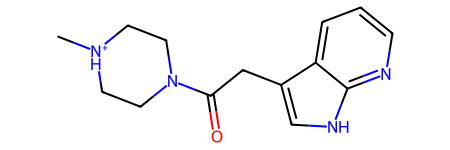

In [49]:
Chem.MolFromSmiles(datapoint["CXSMILES"].item())

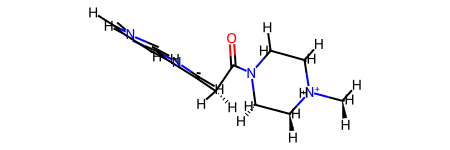

In [50]:
datapoint["ligand_pose"].item()

In [51]:
import datamol as dm

In [52]:
mol = dm.to_mol(datapoint["CXSMILES"].item())

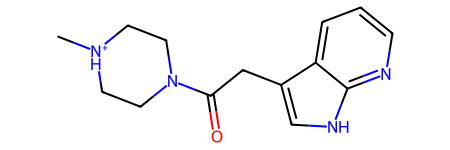

In [53]:
mol

In [54]:
mol = dm.conformers.generate(mol, n_confs=1)

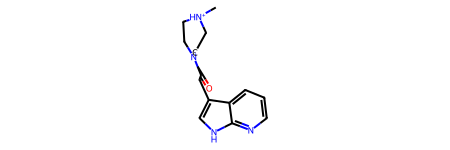

In [55]:
mol

In [56]:
type(mol)

rdkit.Chem.rdchem.Mol

In [57]:
from polaris_asap_poses.io import read_sdf, write_sdf

<string>:1: InstrumentationWarning: instrumentor did not find the target function -- not typechecking polaris_asap_poses.io.write_sdf
<string>:1: InstrumentationWarning: instrumentor did not find the target function -- not typechecking polaris_asap_poses.io.read_sdf


In [62]:
foo = read_sdf("data/raw/reference_structures/SARS-CoV-2-Mpro/ligand.sdf")

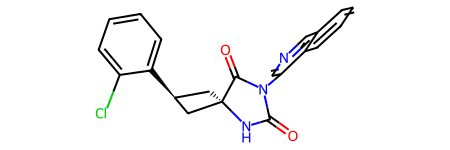

In [63]:
foo

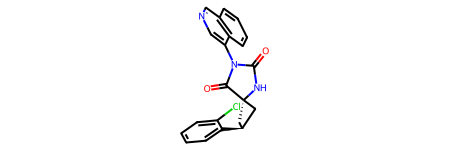

In [64]:
foo_jiggled = dm.conformers.generate(foo, n_confs=1)
foo_jiggled

In [66]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
fpgen = AllChem.GetRDKitFPGenerator()

In [67]:
write_sdf(foo_jiggled, "./foo_jiggled.sdf")

In [68]:
foo_jiggled_from_disk = read_sdf("./foo_jiggled.sdf")

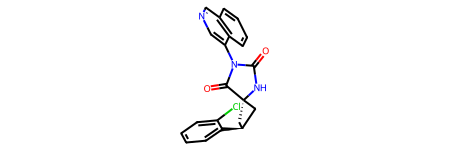

In [69]:
foo_jiggled_from_disk